In [10]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading dataset
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Changing job_posted_date to date time format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
df_Da_Us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_Da_Us = df_Da_Us.dropna(subset = ['salary_year_avg']) 


In [12]:
df_Da_Us = df_Da_Us.explode('job_skills')

df_Da_Us[['job_skills', 'salary_year_avg']]

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0
...,...,...
784882,sql,87500.0
784882,vba,87500.0
784882,tableau,87500.0
784882,excel,87500.0


In [18]:
df_Da_Us_grouped = df_Da_Us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_Da_top_pay = df_Da_Us_grouped.sort_values(by = 'median', ascending= False).head(10)

df_Da_skill = df_Da_Us_grouped.sort_values(by = 'count', ascending= False).head(10).sort_values(by = 'median', ascending= False)

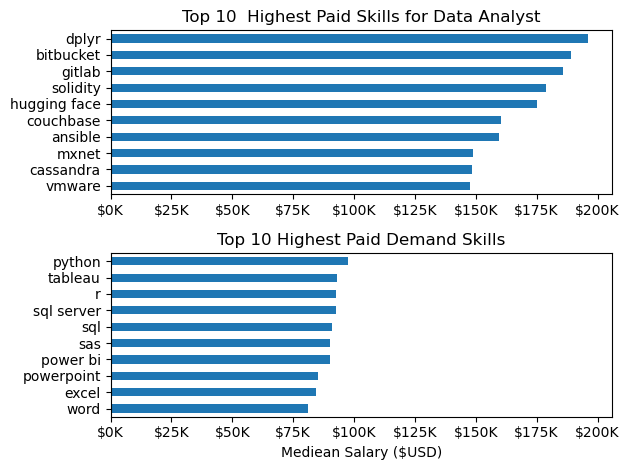

In [32]:
fig, ax = plt.subplots(2,1)

df_Da_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend= False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10  Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f'${int(x/1000)}K'))

df_Da_skill.plot(kind = 'barh', y = 'median', ax = ax[1], legend= False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Highest Paid Demand Skills')
ax[1].set_xlabel('Mediean Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()
